In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
from keras.datasets import fashion_mnist

In [4]:
fashion_mnist=fashion_mnist

In [12]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

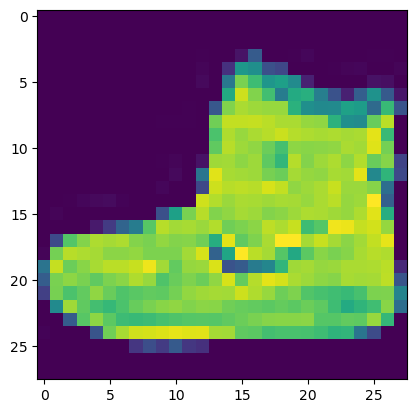

In [8]:
plt.imshow(x_train_full[0])

In [9]:
y_train_full[0]

9

In [10]:
class_names=["T-shirt/top","Trousers","Pullover","Dress","Coat",
            "Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [11]:
class_names[y_train_full[0]]

'Ankle Boot'

## Data Normalisation
### We then normalize data dimensions so that they are approximately the same scale
Here we need to normalise the data as we will use gradient descent we need the values to be between 0 and 1. So since in these images the pixels lye between 0 to 255 we simply divide each pixel value by 255.


In [13]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

## Split the data into train/validation/test datasets
### In the earlier step of importing the date, we had 60,000 datasets for training and 10,0000 test datasets.Now we further split them into train/validation. Here is how each type of dataset is used in deep learning:
#### Training Data- Used for training the model
#### Validation Data- Used for tuning the hyperparametersand evaluate the models
#### Test Data- Used to test the model after the model has gone through initial vetting by the validation set

In [15]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [16]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create the model architecture
### There are two APIs for defining a model in keras:
#### Sequential model API: For simple sequential neural network from input to hidden layer and then output
#### Functional API: For more complex networks and functions, this gives us more flexibility in creating models but is more complex in nature

In [17]:
import numpy as np

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
import pydot
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


We can access the parameters using get_weight() method

In [27]:
weights,biases=model.layers[1].get_weights()

In [28]:
weights

array([[ 0.04945498, -0.01622916,  0.04707263, ..., -0.05804585,
        -0.02854815, -0.0328203 ],
       [-0.06050479, -0.04588559, -0.0685216 , ..., -0.00860747,
        -0.01717778, -0.02502261],
       [ 0.06411327, -0.03875396, -0.01441133, ..., -0.06772719,
        -0.017618  ,  0.03107365],
       ...,
       [-0.02240467, -0.04665323, -0.03612655, ...,  0.03261161,
        -0.00024095,  0.04220664],
       [-0.04009198,  0.03368656,  0.02469592, ...,  0.02245254,
        -0.01610473, -0.06217999],
       [ 0.04943169, -0.04900552,  0.01731058, ..., -0.01806984,
        -0.01944134,  0.00724968]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [35]:
model_history=model.fit(x_train,y_train,epochs=30,
                        validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 3ms/step - loss: 0.7178 - accuracy: 0.7657 - val_loss: 0.5247 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4909 - accuracy: 0.8263 - val_loss: 0.4397 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4457 - accuracy: 0.8427 - val_loss: 0.5493 - val_accuracy: 0.7944
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8547 - val_loss: 0.4007 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3996 - accuracy: 0.8608 - val_loss: 0.3814 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3808 - accuracy: 0.8662 - val_loss: 0.3750 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3688 - accuracy: 0.8709 - val_loss: 0.3664 - val_accuracy

In [37]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
model_history.history

{'loss': [0.7177793979644775,
  0.4908774793148041,
  0.4456648528575897,
  0.4186641275882721,
  0.39955490827560425,
  0.38077840209007263,
  0.3688029944896698,
  0.35758817195892334,
  0.3469041883945465,
  0.3376930356025696,
  0.32961130142211914,
  0.3204866051673889,
  0.31334981322288513,
  0.3070938289165497,
  0.2991558313369751,
  0.2942509949207306,
  0.28823351860046387,
  0.28208404779434204,
  0.2768295109272003,
  0.2719785273075104,
  0.26669254899024963,
  0.26196929812431335,
  0.2573220729827881,
  0.2526983320713043,
  0.24863293766975403,
  0.2438713014125824,
  0.24085575342178345,
  0.23701496422290802,
  0.2326425015926361,
  0.2285875678062439],
 'accuracy': [0.7656727433204651,
  0.82627272605896,
  0.8427272439002991,
  0.8546727299690247,
  0.86080002784729,
  0.8661636114120483,
  0.8709090948104858,
  0.8737818002700806,
  0.8769272565841675,
  0.8798545598983765,
  0.8831090927124023,
  0.8852909207344055,
  0.8880727291107178,
  0.8905272483825684,
  0

In [39]:
import pandas as pd

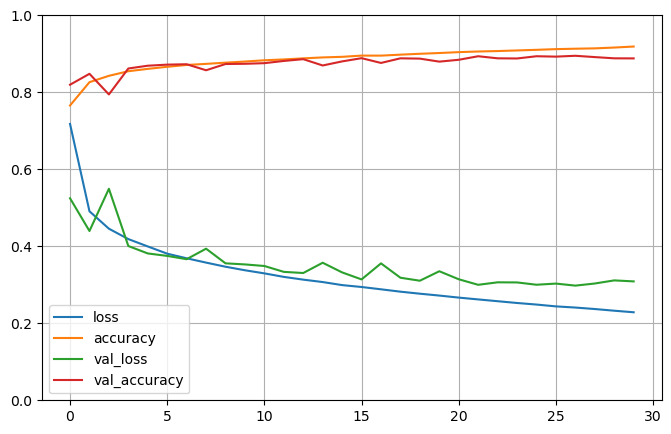

In [40]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### In the above graph it can be seen that the values have not yet converged therefore there is more room to get a more accurate model so if we run the fit module again it fill run for more epochs and will start with the last value where it left off, and return us a more accurate model as it can be seen in the graph that the accuracy is still going up and the loss is still going down through the graph.

In [41]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 4ms/step - loss: 80.5068 - accuracy: 0.8283


[80.5068359375, 0.8282999992370605]

In [42]:
x_new=x_test[:3]

In [43]:
y_prob=model.predict(x_new)
y_prob

1/1 [==============================] - 4s 4s/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
y_pred=np.argmax(model.predict(x_new), axis=-1)
y_pred

1/1 [==============================] - 0s 206ms/step


array([9, 2, 1], dtype=int64)

In [52]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trousers'], dtype='<U11')

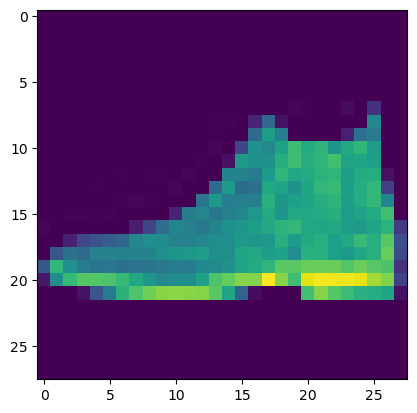

In [53]:
plt.imshow(x_test[0])